In [1]:
# Importing necessary libraries
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
import matplotlib.pyplot as plt
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import io
from PIL import Image
import tqdm
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix

#### Specifying our Image data Paths

In [2]:
train_path = "C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training" 
test_path = "C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Testing"

#### Defining Our output Labels

In [3]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

Appending images from the directories into a Python list and then converting them into numpy arrays after resizing it.


In [4]:
X_train = []
y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(train_path,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

In [5]:
for i in labels:
    folderPath = os.path.join(test_path,i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

In [6]:
# converting them into numpy arrays after resizing.
X_train = np.array(X_train)
y_train = np.array(y_train)

Reshuffling the training data to prevent any sytematic orderings that can affect the training process

In [7]:
# reshuffle the train data with a random state of 101
X_train,y_train = shuffle(X_train,y_train,random_state=101)

In [8]:
# Checking the shape
X_train.shape

(3264, 150, 150, 3)

#### Performing our train test split

In [9]:
# Splitting our dataset
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=101)

Performing One Hot Encoding on the labels after converting them into numerical values:

In [10]:
# one hot encoding on the train data
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

In [11]:
# one hot encoding on the train data
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

#### Importing and defining our CNN model

Constructor Stage

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

Compilation Stage

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Training Stage

In [14]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 308s 4s/step - loss: 3.3406 - accuracy: 0.2913 - val_loss: 1.3627 - val_accuracy: 0.2959
Epoch 2/30
83/83 [==============================] - 305s 4s/step - loss: 1.2595 - accuracy: 0.4215 - val_loss: 1.0892 - val_accuracy: 0.5102
Epoch 3/30
83/83 [==============================] - 301s 4s/step - loss: 1.0604 - accuracy: 0.5335 - val_loss: 0.9870 - val_accuracy: 0.5476
Epoch 4/30
83/83 [==============================] - 298s 4s/step - loss: 0.9370 - accuracy: 0.6073 - val_loss: 0.8700 - val_accuracy: 0.6190
Epoch 5/30
83/83 [==============================] - 317s 4s/step - loss: 0.8300 - accuracy: 0.6659 - val_loss: 0.8968 - val_accuracy: 0.5816
Epoch 6/30
83/83 [==============================] - 303s 4s/step - loss: 0.7531 - accuracy: 0.6863 - val_loss: 0.8448 - val_accuracy: 0.6156
Epoch 7/30
83/83 [==============================] - 298s 4s/step - loss: 0.6649 - accuracy: 0.7348 - val_loss: 0.7481 - val_accuracy: 0.6769
Epoch 8/30
83

#### Visualising Results

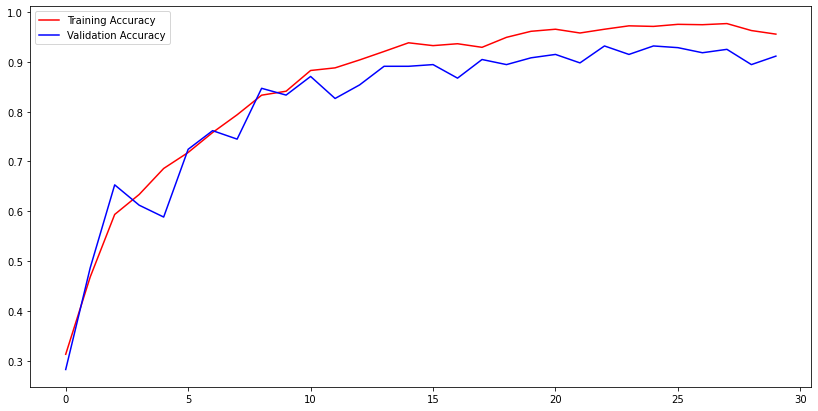

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

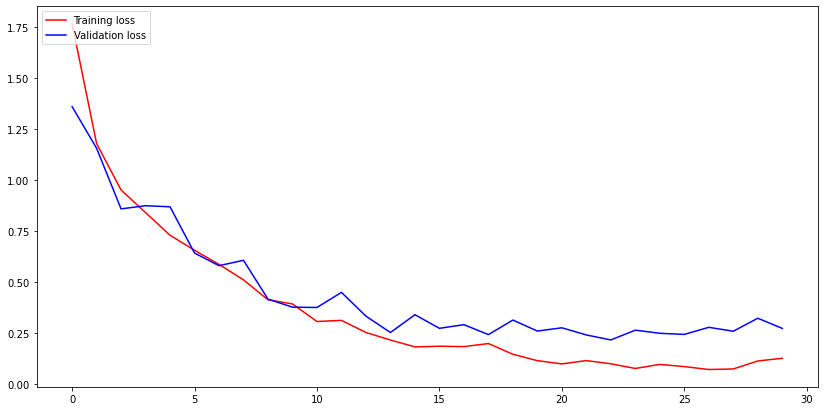

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

#### Reading the images

In [33]:
# Creating the directories to the images
glioma_img_url = "C:/Users/Franks/Desktop/APPLIED AI 3_4_2023/Training/glioma_tumor/gg (1).jpg"
meningioma_img_url = r"C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Training\meningioma_tumor\m (2).jpg"
no_tumor_img_url = r"C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Training\no_tumor\1.jpg"
pituitary_img_url = r"C:\Users\Franks\Desktop\APPLIED AI 3_4_2023\Training\pituitary_tumor\p (1).jpg"

Reading the images

In [34]:
# Read Image from url 
glioma_img = cv2.imread(glioma_img_url)
meningioma_img = cv2.imread(meningioma_img_url)
no_tumor_img = cv2.imread(no_tumor_img_url)
pituitary_img = cv2.imread(pituitary_img_url)

In [35]:
# Converting the images from BGR to RGB
glioma_img = cv2.cvtColor(glioma_img,cv2.COLOR_BGR2RGB) # converting to RGB
meningioma_img = cv2.cvtColor(meningioma_img,cv2.COLOR_BGR2RGB) # converting to RGB
no_tumor_img = cv2.cvtColor(no_tumor_img,cv2.COLOR_BGR2RGB) # converting to RGB
pituitary_img = cv2.cvtColor(pituitary_img,cv2.COLOR_BGR2RGB) # converting to RGB

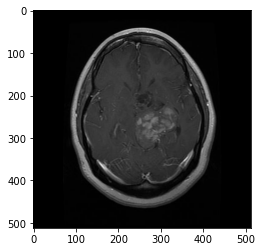

In [36]:
# Show image
plt.imshow(glioma_img)
plt.show()

#### Model Evaluation and Prediction

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)

11/11 [==============================] - 9s 758ms/step


In [39]:
print(cm)

[[88  4  0  1]
 [15 79  0  1]
 [ 4  2 45  1]
 [ 0  1  0 86]]


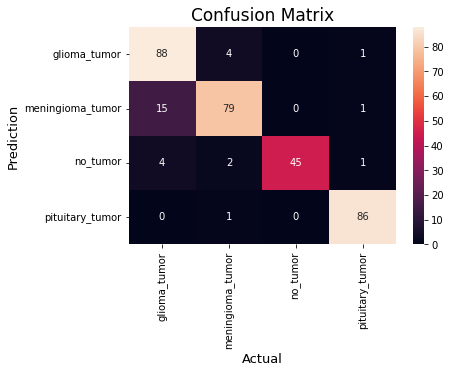

In [40]:
# Plotting the confusion matrix trend
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'],
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [41]:
# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred, )
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision :", precision)
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred, average='weighted')
print("F1-score  :", F1_score)

Accuracy   : 0.9113149847094801
Precision : 0.9168832993859738
Recall    : 0.9113149847094801
F1-score  : 0.9114321918921094


In [42]:
print(classification_report(y_test,y_pred, target_names = ['glioma_tumor', 'meningioma_tumor','no_tumor', 'pituitary_tumor' ]))


                  precision    recall  f1-score   support

    glioma_tumor       0.82      0.95      0.88        93
meningioma_tumor       0.92      0.83      0.87        95
        no_tumor       1.00      0.87      0.93        52
 pituitary_tumor       0.97      0.99      0.98        87

        accuracy                           0.91       327
       macro avg       0.93      0.91      0.91       327
    weighted avg       0.92      0.91      0.91       327



#### TRANSFER LEARNING

Using Transfer learning to import Custom pretrained models for performance comparism with our custom model for any improvement

#### EfficientNetB0 Pretrained model and VGG-16 Pretrained Model performance will be imported and evaluated then compared with our custom model for improvements.